# Slow Water Removal

This notebook demonstrates how long it takes to remove water from geographies
when we produce maps.

In [163]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)
import os

In [164]:
import censusdis.data as ced
import censusdis.maps as cem
import censusdis.states

In [165]:
YEAR = 2020
DATASET = "acs/acs5"
VARIABLE = "B19013_001E"
# We can change the imported state here to NY
STATE = censusdis.states.RI
COUNTIES = ["001", "003", "005", "007", "009"]

The default census geopgraphies often contain areas of water, which can be removed to avoid confusion in map areas along bodies of water. In this default geographic mapping, using the `%%time` time magic function we can time the execution of downloading the dataset for the geographical map.

In [166]:
%%time

gdf_tract = ced.download(
    DATASET,
    YEAR,
    VARIABLE,
    state=STATE,
    county=COUNTIES,
    block_group="*",
    with_geometry=True,
)

CPU times: user 150 ms, sys: 141 ms, total: 291 ms
Wall time: 5.64 s


<Axes: >

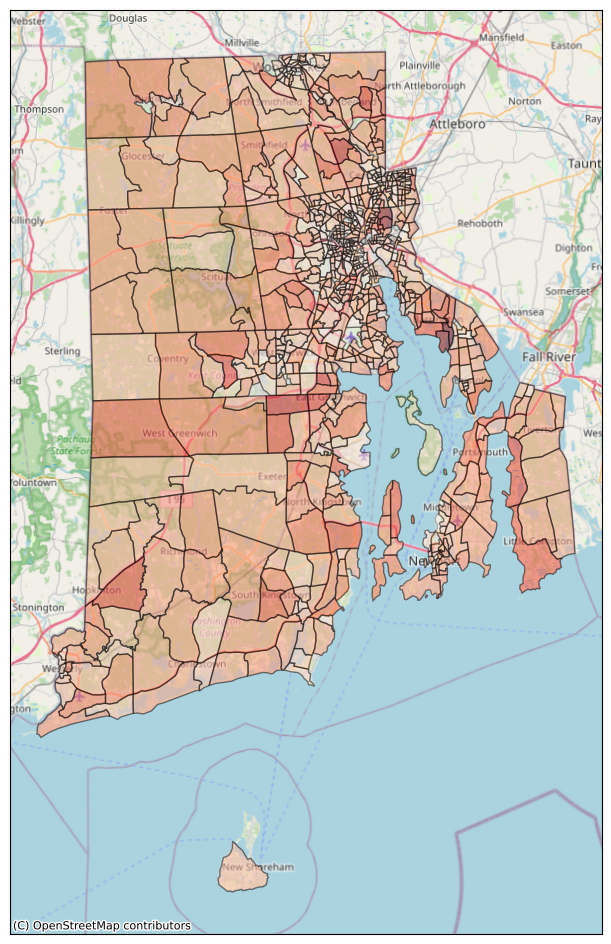

In [167]:
cem.plot_map(
    gdf_tract,
    VARIABLE,
    with_background=True,
    edgecolor="black",
    alpha=0.5,
    cmap="Reds",
    figsize=(12, 12),
)

Setting the `remove_water=True` flag will remove water from the geographies we download. However, it does make the overall proess slower. By using `%%time` we can see the time recorded is longer than without utilizing remove_water.

In [168]:
%%time

gdf_tract_no_water = ced.download(
    DATASET,
    YEAR,
    VARIABLE,
    state=STATE,
    county=COUNTIES,
    block_group="*",
    with_geometry=True,
    remove_water=True,
)

/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


CPU times: user 4.75 s, sys: 239 ms, total: 4.99 s
Wall time: 7.42 s


<Axes: >

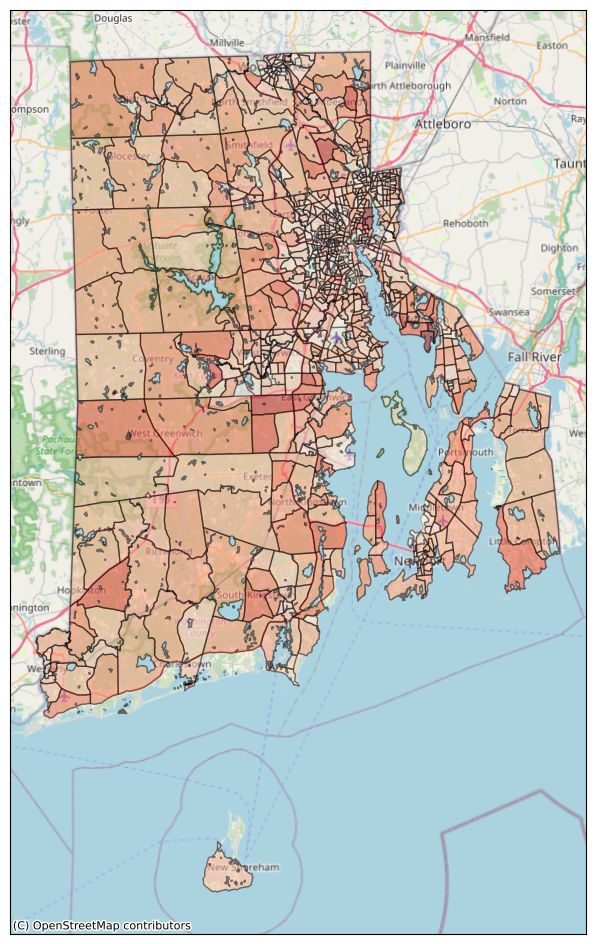

In [169]:
cem.plot_map(
    gdf_tract_no_water,
    VARIABLE,
    with_background=True,
    edgecolor="black",
    alpha=0.5,
    cmap="Reds",
    figsize=(12, 12),
)